Considering the column_diagnosis.arff dataset available at the course webpage’s homework tab.
Using sklearn, apply a 10-fold stratified cross-validation with shuffling (random_state=0) for the
assessment of predictive models along this section.

In [47]:
import pandas as pd
from scipy.io.arff import loadarff

data = loadarff('data/column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X, y = df.drop('class', axis=1), df['class']

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


1) Compare the performance of 𝑘NN with 𝑘 = 5 and naïve Bayes with Gaussian assumption
(consider all remaining parameters for each classifier as sklearn’s default):

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = [
    ("Gaussian Naive Bayes", GaussianNB()),
    ("kNN", KNeighborsClassifier(n_neighbors=5))
]

a. Plot two boxplots with the fold accuracies for each classifier.

In [41]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
fold_accs = [(cls[0], cross_val_score(cls[1], X, y, cv=fold, scoring='accuracy')) for cls in classifiers]

<Axes: xlabel='Classifier', ylabel='Accuracy'>

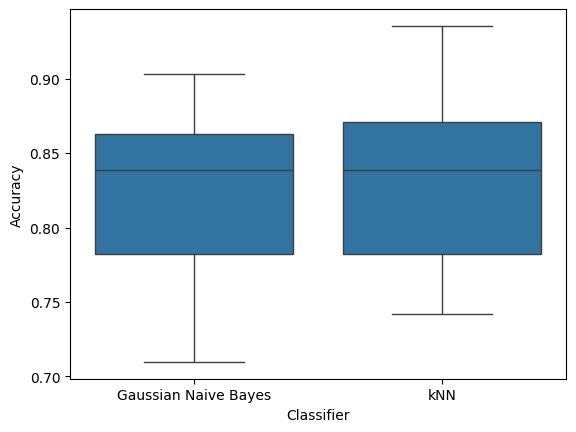

In [40]:
import seaborn as sns

fold_accs_join = []
for cls in fold_accs:
    fold_accs_join.extend(list(zip([cls[0] for i in range(10)], cls[1])))

fold_accs_df = pd.DataFrame(fold_accs_join, columns=['Classifier', 'Accuracy'])

sns.boxplot(x='Classifier', y='Accuracy', data=fold_accs_df)

b. Using scipy, test the hypothesis “𝑘NN is statistically superior to naïve Bayes regarding
accuracy”, asserting whether is true.

In [42]:
from scipy import stats

res = stats.ttest_rel(fold_accs[0][1], fold_accs[1][1], alternative='greater')
print('NB > kNN, pvalue=', res.pvalue)

res = stats.ttest_rel(fold_accs[0][1], fold_accs[1][1], alternative='less')
print('NB < kNN, pvalue=', res.pvalue)

res = stats.ttest_rel(fold_accs[0][1], fold_accs[1][1], alternative='two-sided')
print('NB != kNN, pvalue=', res.pvalue)

NB > kNN, pvalue= 0.8095719093793591
NB < kNN, pvalue= 0.19042809062064092
NB != kNN, pvalue= 0.38085618124128184


In [49]:
from sklearn.model_selection import cross_val_predict

predict = KNeighborsClassifier(n_neighbors=5)

res = cross_val_predict(predict, X, y, cv=fold)
new_df = pd.DataFrame(res)
new_df

,0
0,Normal
1,Hernia
2,Normal
3,Hernia
4,Hernia
...,...
305,Normal
306,Hernia
307,Normal
308,Normal
